In [269]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import torch
from matplotlib.markers import MarkerStyle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

In [265]:
# Read file for BasicEntangling
BE_freqs = np.load(
    "/Users/marioherreroglez/Desktop/PQCs_Fourier_Coeffs/logs/pauli_encoding/BasicEntangling_one_qubit_qubit_measured_00_qubits_04_circ_layers_01_periodic_layers_05/55000_samples/freqs.npy"
).astype(np.complex128)
BE_c_w = np.load(
    "/Users/marioherreroglez/Desktop/PQCs_Fourier_Coeffs/logs/pauli_encoding/BasicEntangling_one_qubit_qubit_measured_00_qubits_04_circ_layers_01_periodic_layers_05/55000_samples/coeffs.npy"
).astype(np.complex128)
BE_avg_abs_c_w_2 = np.load(
    "/Users/marioherreroglez/Desktop/PQCs_Fourier_Coeffs/logs/pauli_encoding/BasicEntangling_one_qubit_qubit_measured_00_qubits_04_circ_layers_01_periodic_layers_05/55000_samples/abs_coeffs_avg.npy"
).astype(np.complex128)

In [266]:
# Read file for StronglyEntangling
SE_freqs = np.load(
    "/Users/marioherreroglez/Desktop/PQCs_Fourier_Coeffs/logs/pauli_encoding/StronglyEntangling_one_qubit_qubit_measured_00_qubits_04_circ_layers_01_periodic_layers_05/55000_samples/freqs.npy"
).astype(np.complex128)
SE_c_w = np.load(
    "/Users/marioherreroglez/Desktop/PQCs_Fourier_Coeffs/logs/pauli_encoding/StronglyEntangling_one_qubit_qubit_measured_00_qubits_04_circ_layers_01_periodic_layers_05/55000_samples/coeffs.npy"
).astype(np.complex128)
SE_avg_abs_c_w_2 = np.load(
    "/Users/marioherreroglez/Desktop/PQCs_Fourier_Coeffs/logs/pauli_encoding/StronglyEntangling_one_qubit_qubit_measured_00_qubits_04_circ_layers_01_periodic_layers_05/55000_samples/abs_coeffs_avg.npy"
).astype(np.complex128)

In [293]:
# set sns white grid style
# matplotlib.use("pgf")
sns.set_style("whitegrid")
matplotlib.rcParams.update(
    {
        "pgf.preamble": (
            r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\expected}{\operatorname{\mathds{E}}} \newcommand{\Var}{\operatorname{\mathds{V}\!ar}} "
        ),
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)
matplotlib.rcParams["text.latex.preamble"] = (
    r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\expected}{\operatorname{\mathds{E}}} \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"
)


def plot_pannel_samples_coeffs(
    freqs, coefficients, avg_abs_coefficients, ansatz="StronglyEntangling"
):  
    
    label_fontsize = 20
    colorbar_fontsize = 18
    coeffs_real = np.real(coefficients)
    coeffs_imag = np.imag(coefficients)
    abs_coefficients = np.abs(coefficients)
    bone_cmap = cm.get_cmap("bone_r")
    pink_cmap = cm.get_cmap("pink_r")
    # Define the start point (0 is the start, 1 is the end of the colormap)
    start = 0.3  # Adjust this value to control the starting shade

    # Create a new colormap starting from 'start' point of the original 'bone' colormap
    darker_bone_cmap = mcolors.LinearSegmentedColormap.from_list(
        "truncated_bone", bone_cmap(np.linspace(start, 1, 256))
    )
    darker_pink_cmap = mcolors.LinearSegmentedColormap.from_list(
        "truncated_pink", pink_cmap(np.linspace(start, 1, 256))
    )
    # Number of subplots in the grid
    n_subplots = len(freqs)  # Change this value as needed
    if ansatz == "StronglyEntangling":
        cmap = darker_bone_cmap
        last_color = bone_cmap(0.9)
    else:
        cmap = darker_pink_cmap
        last_color = pink_cmap(0.9)
    # Create a figure
    fig = plt.figure(figsize=(22, 3))

    # Define the GridSpec layout
    # 1 row, n_subplots + 1 columns, with the last column being wider
    gs = gridspec.GridSpec(1, n_subplots + 1, width_ratios=[1] * n_subplots + [2])
    # Dynamically create subplots in the grid
    for idx, i in enumerate(range(n_subplots)):
        ax_ = fig.add_subplot(gs[0, i])
        max_abs_val = np.max(abs_coefficients[:, idx]) * 1.1  # Adding a 10% margin
        ax_.set_title(r"$c_{}$".format(idx), fontsize=label_fontsize)

        if idx == 0:
            gridsize = 1000
        else:
            gridsize = 100
        # Creating a hexbin plot for density
        hb = ax_.hexbin(
            coeffs_real[:, idx],
            coeffs_imag[:, idx],
            gridsize=gridsize,
            cmap=cmap,
            mincnt=1,
            zorder=1,
        )

        # Extract bin counts and locations
        counts = hb.get_array()
        verts = hb.get_offsets()
        x, y = verts[:, 0], verts[:, 1]
        # Adding a color bar per subplot
        cb = plt.colorbar(hb, ax=ax_)
        
        # ax_.set_xlim(-1,1)
        # ax_.set_ylim(-1,1)
        ax_.set_xlabel(r"$\Re(c_{}$)".format(idx), fontsize=label_fontsize)
        ax_.set_ylabel(r"$\Im(c_{}$)".format(idx), fontsize=label_fontsize)
        ax_.set_xlim(-max_abs_val, max_abs_val)
        ax_.set_ylim(-max_abs_val, max_abs_val)
        ax_.tick_params(axis="both", which="major", labelsize=14)
        ax_.yaxis.set_label_coords(-0.3, 0.5)
        cb.ax.tick_params(labelsize=14)
        formatter = ScalarFormatter(useMathText=True)
        formatter.set_powerlimits((-3, 3))  # Adjust these limits based on your data range
        cb.ax.yaxis.set_major_formatter(formatter)
        cb.set_label("counts",fontsize=colorbar_fontsize) 
        # This line adds the exponent to the colorbar
        cb.ax.yaxis.get_offset_text().set(size=12, position=(6,-1))
        # If max abs value is 0, set the limits to (-1, 1)
        # take into account that 0 could be 1e-16 or something like that
        # plot grid in the backround
        # ax_.grid(zorder=0)
        toplimit = 1e-6
        bottomlimit = -1e-6
        if max_abs_val < 5e-7:
            ax_.set_xlim(bottomlimit, toplimit)
            ax_.set_ylim(bottomlimit, toplimit)
        if np.max(coeffs_imag[:, idx]) < 5e-16 and np.max(coeffs_real[:, idx]) > 5e-16:
            ax_.set_ylim(-1e-1, 1e-1)

    # Create a unique plot in the last column
    ax_unique = fig.add_subplot(gs[0, n_subplots])
    ax_unique_position = ax_unique.get_position().bounds
    new_left = (
        ax_unique_position[0] + 0.01
    )  # Adjust this value to move the axis to the right
    new_bottom = ax_unique_position[1]
    new_width = ax_unique_position[2]
    new_height = ax_unique_position[3]
    ax_unique.set_position([new_left, new_bottom, new_width, new_height])
    ax_unique.plot(
        freqs, avg_abs_coefficients, color=last_color, marker="o", markersize=5
    )
    ax_unique.set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
    ax_unique.set_ylabel(
        r"$\expected \left[|c_{\omega}|^2\right]$", fontsize=label_fontsize
    )
    # ax_unique.set_ylabel(r"\E [|c_{\omega}|^2]")

    plt.tight_layout()
    fig.savefig("figs_numerics/" + ansatz + "_coeffs_pannel.pdf")
    plt.show()
    return fig


# plt.savefig("figsStronglyEntangling_"+"coeffs_pannel.pgf")

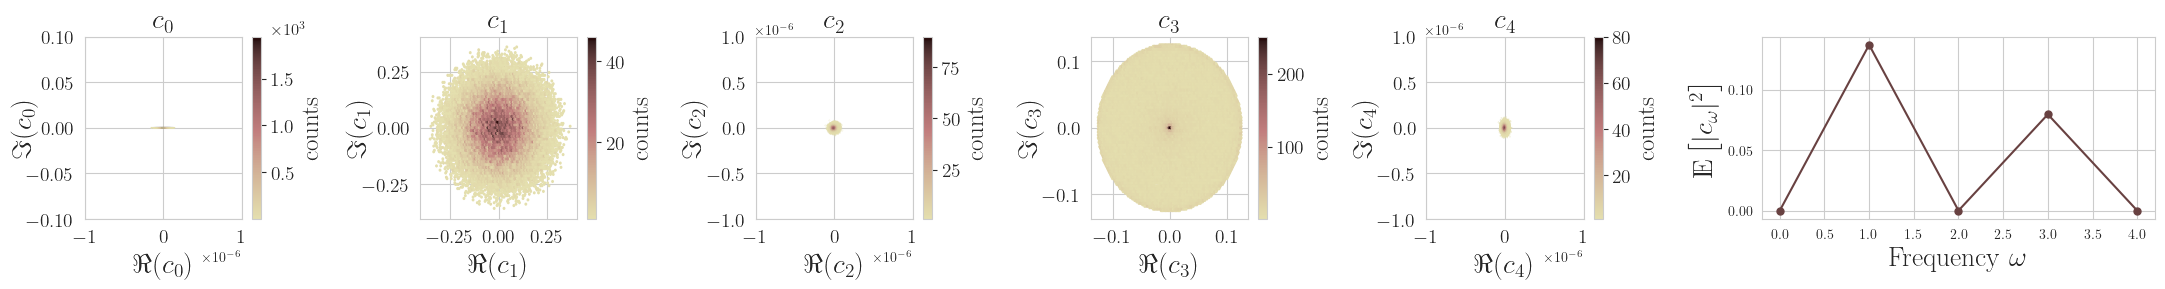

In [294]:
fig = plot_pannel_samples_coeffs(
    BE_freqs, BE_c_w, BE_avg_abs_c_w_2, ansatz="BasicEntangling"
)

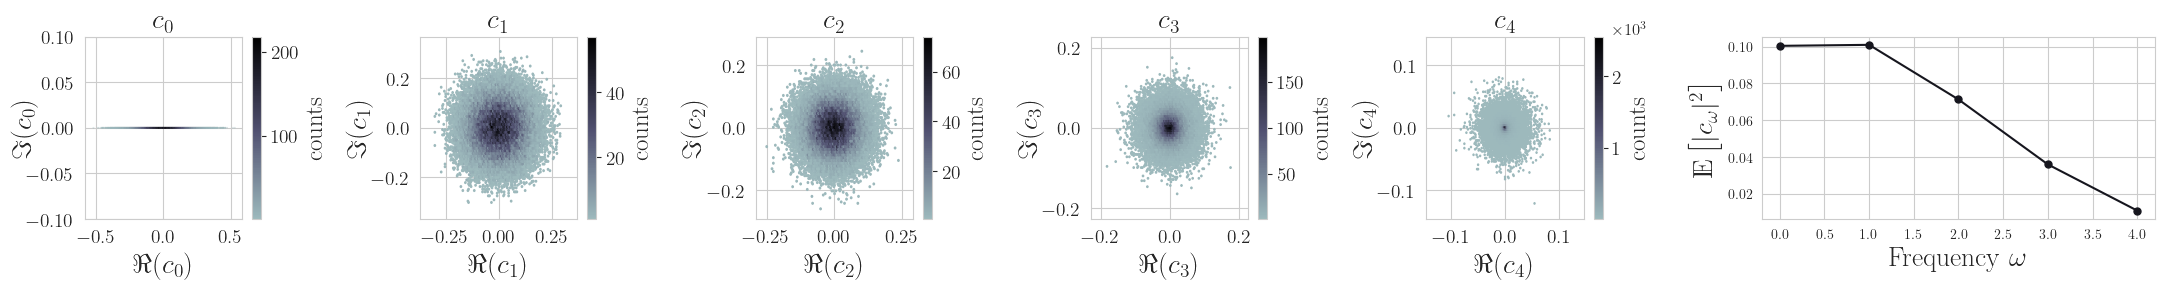

In [295]:
fig = plot_pannel_samples_coeffs(
    SE_freqs, SE_c_w, SE_avg_abs_c_w_2, "StronglyEntangling"
)